## MS211 Atividade 5 - *Métodos Numéricos para Resolução de Problemas de Valor Inicial*


Aluno: João Pedro Bizzi Velho

RA:218711

## Questão 1


O problema é dado por:
> $p' = (1 + 0.5cos(2\pi t)(1 - \frac{p}{(1+0.5sin(\frac{3\pi t}{2})})$

> $p(0) = 0.4$

## item 1 

Solução numérica do PVI no intervalo de $[0,10]$ utilizando Runge-Kutta de ordem 4 e com passo $h = 2^{-3}$:
Neste caso, temos que:

> $p' = f(t,p) = y' = f(t,y)$

> $p(0) = y(0) = 0.4$


In [217]:
import math
import numpy as np
import matplotlib.pyplot as plt

h = 1/8
def p_linha(t,p):
    return (1 + 0.5*math.cos(2*np.pi*t))*(1 - p/(1+0.5*math.sin(3*np.pi*t/2)))


In [ ]:
def Runge_Kutta(y_linha,x0,h):
    y = []
    pontos = int((10/h) + 1)
    x = np.linspace(0,10,pontos)
    y.append(x0)
    
    for i in x:
        if i != x[len(x) - 1]:
            index = len(y) - 1
            k_1 = y_linha(i,y[index])
            k_2 = y_linha(i + h/2,y[index] + k_1*h/2)
            k_3 = y_linha(i + h/2,y[index] + k_2*h/2)
            k_4 = y_linha(i + h,y[index] + k_3*h)
            y.append(y[index] + (h/6)*(k_1+2*k_2+2*k_3+k_4))
    return y,x

O valor de p(10) é: 0.9323633627130545


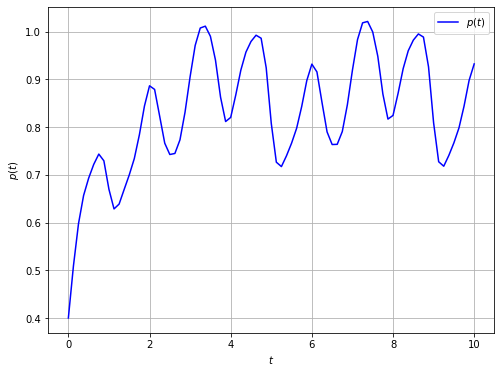

In [218]:
pr,tr = Runge_Kutta(p_linha,0.4,1/8)
plt.figure(figsize = (8,6))
plt.plot(tr,pr,label = '$p(t)$',color = 'b')
plt.xlabel('$t$')
plt.ylabel('$p(t)$')
plt.legend()
plt.grid()
plt.show
print("O valor de p(10) é:",p[len(p) - 1])

## *item 2*

O erro de um método númerico é dado pela expressão:


>$ e(x_{k + 1}) = |y(x_{k + 1}) - y_{k + 1}|$

E é dito de ordem $p$ se satisfaz:

>$ e(x_{k + 1}) = |y(x_{k + 1}) - y_{k + 1}| < Ch^{p+1}$

Sabemos que o valor de $p$ para Runge-Kutta é $4$ e para Heun é $2$. 

Temos as duas equações:

> >$ |y(x_{k + 1}) - 0,932| < C*0,125^5$

> >$ |y(x_{k + 1}) - y_{k+1}| < C*h^3$

Temos portanto que:

> $C * 0,125^5 = C*h^3 \rightarrow \sqrt{3}{0,125^5} = h$

Com isto teremos um passo $h$:

> $ h = 0,005 $

Isto nos dá $10/0,005 = 2000$ pontos na malha com o método de Heun.

## *item 3*

In [219]:
def Heun(y_linha,x0,h):
    y = [] # guardamos o resultado
    #y_linha é o f(x,y)
    pontos = (10/h) + 1
    x = np.linspace(0,10,int(pontos)) # define o intervalo com todos os pontos de acordo com o tamanho do passo
    y.append(x0)

    for i in x:
        if i != x[len(x) - 1]:
            index = len(y) - 1
            k_1 = y_linha(i,y[index])
            k_2 = y_linha(i + h,y[index] + k_1*h)
            y.append(y[index] + (h/2)*(k_1+k_2))
    return y,x

O valor de p(10) é: 0.9323633627130545


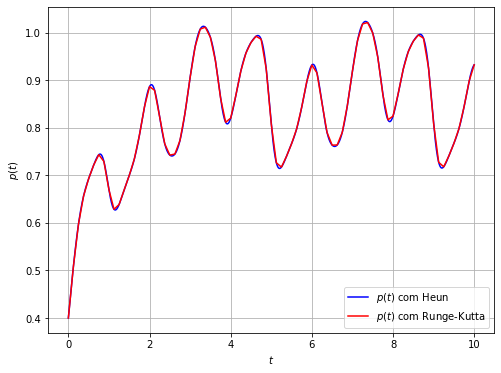

In [220]:
ph, th = Heun(p_linha,0.4,0.005)

plt.figure(figsize = (8,6))
plt.plot(th,ph,label = '$p(t)$ com Heun',color = 'b')
plt.plot(tr,pr,label = '$p(t)$ com Runge-Kutta',color = 'r')
plt.xlabel('$t$')
plt.ylabel('$p(t)$')
plt.legend()
plt.grid()
plt.show
print("O valor de p(10) é:",p[len(p) - 1])

Plotando os dois gráficos para as duas soluções notamos que o valor obtido no item b está de acordo com o esperado, pois, os gráficos praticamente se sobrepoem. Logo o cálculo foi correto.


## Questão 2


Foi dado que o deslocamento de um veículo $i$ em uma pista é ajustado de acorrdo com a velocidade do veículo à sua frente, sendo a velocidade ótima dada por:

> $ \frac{d^2x_i}{dt} = a(V(\Delta x_i) - \frac{d x_i}{dt}), \forall i = 1,\dots,N,$

onde:
> $x_i(t)$ denota a posição do carro $i$ no instante $t$;

> $\Delta x_i = x_{i-1}(t) - x_i(t)$ é a distância entre o carro $i$ e o carro $i-1$;

>$V(.)$ é a função que retorna a velocidade ótimma considerando a distância $\Delta x_i$ entre dois carros;

>$N$ é o número de veículos na pista;

>$a$ é a sensibilidade do motorista (quanto maior, mais rápido o carro atinge a velocidade ótima), definido como $ a = 1s^{-1}$ para todos os motoristas.

> A velocidade ótima é dada por:
>> $V(\Delta x_i) = \frac{v_{max}}{2}[tanh(\frac{\Delta x_i - \Delta s}{20}) + tanh(4)]$;

>> Onde $\Delta s$ é a distância de segurança em metros.

No enunciado temos 4 carros, logo $N = 4$, além disto:

> $v_{max} = 50 km/h \approx 14m/s$

> $\Delta s = 42 m$

> Instante inicial e posição inicial: 

>>$x = 0 $ e $t = 0$

> As posições iniciais de cada carro são:
>> $x_1(0) = -14 m$

>> $x_2(0) = -18 m$

>> $x_3(0) = -26 m$

>> $x_4(0) = -31 m$

> Deve ser considerado também um ônibus na frente de todos, sendo que sua posição é descrita por:
>> $\beta(t) = 8t - 90sen(0.1t)$

Devemos considerar também que como os carros estão parados no início teremos que:

> $x_i(0) = 0$ $ \forall$ $i = 1, 2, 3 $ e $ 4$


## *item 1*
Se utilizarmos a fórmula da velocidade, dada por:
$V(t) = v_0 + a*t$, podemos obter as equações diferenciais para o sistema.
Temos que para um veículo $i$:


>$V_0 = 0$

>$a = x_i''(t)$

Manipulando a equação da aceleração temos:

>$x''_i(t) = 1 * [(7)[tanh(\frac{x_{i-1}(t) - x_i(t) -42}{20}) + tanh(4)] - x_i'(t)]$

>$x''_i(t) = 7tanh(\frac{x_{i-1}(t) - x_i(t) -42}{20}) + 7*tanh(4) - x_i'(t)$

Substituindo temos que:

>$x_i'(t) = t(7tanh(\frac{x_{i-1}(t) - x_i(t) -42}{20}) + 7*tanh(4) - x_i'(t)) $

>$x_i'(t) + tx_i'(t) =  7t*tanh(\frac{x_{i-1}(t) - x_i(t) -42}{20}) + 7t*tanh(4)$

>$x_i'(t) = \frac{7t}{t + 1}(tanh(\frac{x_{i-1}(t) - x_i(t) -42}{20}) + tanh(4))$
Logo, se fizermos para todos os valores de $i$:
>>$x_1'(t) = \frac{7t}{t + 1}(tanh(\frac{80t-90*sin(0.1t) - x_1(t) -42}{20}) + tanh(4))$

>>$x_2'(t) = \frac{7t}{t + 1}(tanh(\frac{x_{1}(t) - x_2(t) -42}{20}) + tanh(4))$

>>$x_3'(t) = \frac{7t}{t + 1}(tanh(\frac{x_{2}(t) - x_3(t) -42}{20}) + tanh(4))$

>>$x_4'(t) = \frac{7t}{t + 1}(tanh(\frac{x_{3}(t) - x_4(t) -42}{20}) + tanh(4))$

## *item 2*

Queremos saber $t$ quando $x_4(t) = 1700$.


Para isto precisamos resolver o sistema de equações diferenciais obtido no item anterior com algum dos métodos apresentados em sala. Primeiro definimos as matrizes que definem o sistema.

X -> é a matriz que representa as posições, nos slides é a matriz y.

F -> é a matriz de x' nesta situação

y0 ->é a matriz com as condições iniciais de posição

In [192]:
def x1_linha(t,x,bus):
    soma = math.tanh((bus - x - 42)/20) + math.tanh(4)
    multiplicador = 7*t/(t+1)
    return multiplicador*soma

def x2_linha(t,x1,x2):
    soma = math.tanh((x1 - x2 - 42)/20) + math.tanh(4)
    multiplicador = 7*t/(t+1)
    return multiplicador*soma

def x3_linha(t,x2,x3):
    soma = 7*math.tanh((x2 - x3 - 42)/20) + 7*math.tanh(4)
    multiplicador = 7*t/(t+1)
    return multiplicador*soma

def x4_linha(t,x3,x4):
    soma = 7*math.tanh((x3 - x4 - 42)/20) + 7*math.tanh(4)
    multiplicador = 7*t/(t+1)
    return multiplicador*soma

In [59]:
y0 = np.array([[-14],[-18],[-26],[-31]])


In [205]:
# yk+1 = yk + f(xk,yk)*h
# Usarei o intervalo de  0 < t < 500
# O passo "h" será 0,5, logo teremos 1000 pontos
h = 0.5
npontos = int(500/h + 1)
t = np.linspace(0,500, int(500/h + 1))
# t é a matriz que contem os valores de tempo
x = np.array([np.ones([npontos,1]),np.ones([npontos,1]),np.ones([npontos,1]),np.ones([npontos,1])])
# x é uma matrix com 4 conjuntos de 1000 pontos cada, sendo a matriz que vai conter as posições dos carros!
bus = np.ones([npontos,1])
bus[0] = 0

for i in range(0,4):
    x[i][0] = y0[i]
for tempo in range(1,len(t)):
    bus[tempo] = 8*t[tempo]-90*math.sin(0.1*t[tempo])
    x[0][tempo] =  x[0][tempo - 1] + h*x1_linha(t[tempo - 1], x[0][tempo - 1], bus[tempo])
    x[1][tempo] =  x[1][tempo - 1] + h*x2_linha(t[tempo - 1], x[0][tempo], x[1][tempo-1])
    x[2][tempo] =  x[2][tempo - 1] + h*x3_linha(t[tempo - 1], x[1][tempo], x[2][tempo-1])
    x[3][tempo] =  x[3][tempo - 1] + h*x4_linha(t[tempo - 1], x[2][tempo], x[3][tempo-1]) 


<function matplotlib.pyplot.show>

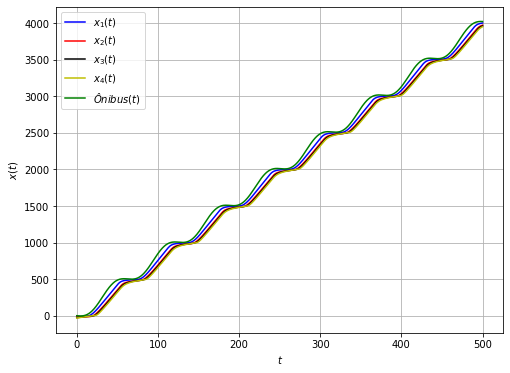

In [207]:
plt.figure(figsize = (8,6))
plt.plot(t,x[0],label = '$x_1(t)$',color = 'b')
plt.plot(t,x[1],label = '$x_2(t)$',color = 'r')
plt.plot(t,x[2],label = '$x_3(t)$',color = 'k')
plt.plot(t,x[3],label = '$x_4(t)$',color = 'y')
plt.plot(t,bus,label = '$Ônibus(t)$',color = 'g')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.legend()
plt.grid()
plt.show

Se quisermos saber qual o valor de $t$ quando $x_4(t) = 1700$ basta varrer a array:


In [214]:
for i in range(0,len(x[0]+ 1)):
    if(x[3][i] >= 1700):
        print('Chega aos 1.7km aos ',i*h,'segundos')
        break

Chega aos 1.7km aos  228.5 segundos


Logo, concluimos que o carro 4 demora 228 segundos e meio para percorrer todo o trajeto, isto é, 3 minutos e 48 segundos e meio.


## *item 3*

Para obtermos as velocidades médias, basta usar a fórmula $v_m = \frac{x_f - x_i}{t_f - t_i}$, considerando um intervalo de $500 s$ teremos:

In [224]:
for i in range(0,4):
    print('Velocidade média do carro',i+1,'foi de ',3.6*(x[i][1000] - x[i][0])/500,'km/h')

Velocidade média do carro 1 foi de  [28.92315265] km/h
Velocidade média do carro 2 foi de  [28.7391193] km/h
Velocidade média do carro 3 foi de  [28.72553] km/h
Velocidade média do carro 4 foi de  [28.67990836] km/h


Velocidade média do carro 1  foi de  28.92315265 km/h

Velocidade média do carro 2  foi de  28.7391193 km/h

Velocidade média do carro 3  foi de  28.72553 km/h

Velocidade média do carro 4  foi de  28.67990836 km/h



Para calcular a velocidade instatânea máxima, basta pegar a diferença entre cada par de pontos do vetor que armazena as posições e dividir pelo intervalo de tempo entre essas duas posições (0,5 sec), o maior valor ao percorrer o vetor todo é a velocidade instatânea máxima do carro:


In [231]:
for j in range(0,4): 
    max = x[j][1] - x[j][0]/0.5
    for i in range(1,len(x[j]) - 1):
        aux = x[j][i+1] - x[j][i]/0.5
        if(aux > max):
            max = aux
    print("A velocidade instantânea máxima do carro",j+1,"é:",max*3.6)
   


A velocidade instantânea máxima do carro 1 é: [50.83589596]
A velocidade instantânea máxima do carro 2 é: [64.98317521]
A velocidade instantânea máxima do carro 3 é: [95.48862733]
A velocidade instantânea máxima do carro 4 é: [113.07342275]


A velocidade instantânea máxima do carro 1 é: [50.83589596]

A velocidade instantânea máxima do carro 2 é: [64.98317521]

A velocidade instantânea máxima do carro 3 é: [95.48862733]

A velocidade instantânea máxima do carro 4 é: [113.07342275]